<a href="https://colab.research.google.com/github/Logan-Bz/PHYS3025Work/blob/main/Numerical_Sol_to_Laplace's_Eqn%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numba
from numba import jit


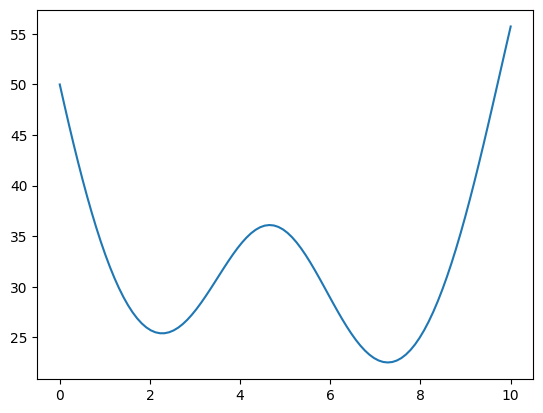

In [305]:
a = 10 #height of our box (default set to 10)
b = 100*a #length of our slot since we can't actually go to infinity numerically

edge = np.linspace(0,a,100)

up = 0
down = 0
left = (edge - a/2)**2 + (np.sin(edge) - a/2)**2 #This is out potential on the y-axis, this is V0(y)
right = 0 #This is to say that as x goes to inifinity (big), our potential goes to zero
plt.plot(edge, left)

Here is a plot to show you what our V0 function looks like. Y-values on the horizontal axis and potential values on the vertical axis.

In [297]:
xv , yv = np.meshgrid(edge, edge)

In [298]:
#funciton that applies Laplace's Equation numerically
@numba.jit("f8[:,:](f8[:,:],i8)", nopython = True, nogil = True)
def compute_potential(potential , n_iter):
  length = len(potential[0])
  for n in range (n_iter):
    for i in range (1, length-1):
      for j in range (1, length-1):
        potential[j][i] = 0.25*(potential[j+1][i] + potential[j-1][i] + potential[j][i+1] + potential[j][i-1])
  return potential


In [306]:
potential = np.ones((100,100)) #initial guess is that the potential is one everywhere

#Boundary conditions:
potential[0,:] = down
potential[-1,:] = up
potential[:,0] = left
potential[:,-1] = right

In [307]:
potential = compute_potential(potential, n_iter = 30)


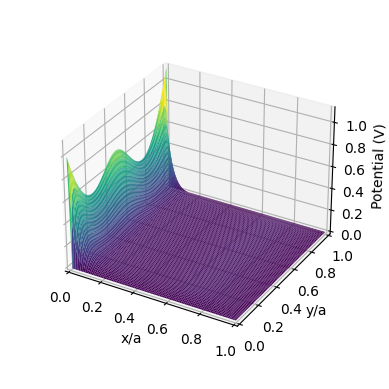

In [310]:
#plot stuff
ax = plt.axes(projection='3d')
ax.plot_surface(xv/a, yv/a, potential/left, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.view_init(30, -60)
ax.set_box_aspect(aspect=None, zoom=0.83)
ax.margins(-0.499,0,-0.499)

ax.set_xlabel('x/a')
ax.set_ylabel('y/a')
ax.set_zlabel('Potential (V)');